In [7]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import plotly.express as px

In [8]:
EDF_APP_OUTPUT_FILE = "/home/muuurk/Projects/RT_computation_node/python_app_edf.txt"
DEFAULT_SCHED_APP_OUTPUT_FILE = "/home/muuurk/Projects/RT_computation_node/python_app_default_scheduler.txt"
EDF_APP_CPUSTRESS_OUTPUT_FILE = "/home/muuurk/Projects/RT_computation_node/python_app_edf_w_cpustress.txt"
DEFAULT_SCHED_APP_CPUSTRESS_OUTPUT_FILE = "/home/muuurk/Projects/RT_computation_node/python_app_default_scheduler_w_cpustress.txt"

In [9]:
df1 = pd.read_csv(EDF_APP_OUTPUT_FILE, sep=" ", header=None, names=["finish times"])
df1['CPU stress'] = "False"
df1['Scheduler'] = "EDF"

df2 = pd.read_csv(DEFAULT_SCHED_APP_OUTPUT_FILE, sep=" ", header=None, names=["finish times"])
df2['CPU stress'] = "False"
df2['Scheduler'] = "Default"

df3 = pd.read_csv(EDF_APP_CPUSTRESS_OUTPUT_FILE, sep=" ", header=None, names=["finish times"])
df3['CPU stress'] = "True"
df3['Scheduler'] = "EDF"

df4 = pd.read_csv(DEFAULT_SCHED_APP_CPUSTRESS_OUTPUT_FILE, sep=" ", header=None, names=["finish times"])
df4['CPU stress'] = "True"
df4['Scheduler'] = "Default"

#finish_times = pd.concat([df1, df2, df3, df4], axis=1)
#finish_times = finish_times.set_axis(['Finish times w/ EDF', 'Finish times w/- EDF'], axis=1, inplace=False)


finish_times = pd.concat([df1, df2, df3, df4], ignore_index=True)
#finish_times = pd.concat([edf_finish_times, default_finish_times], axis=1)
print(finish_times)


     finish times CPU stress Scheduler
0       500151457      False       EDF
1       500070538      False       EDF
2       500034226      False       EDF
3       500068408      False       EDF
4       500150492      False       EDF
..            ...        ...       ...
395     500361936       True   Default
396     500319441       True   Default
397     500534376       True   Default
398     500107392       True   Default
399     500318760       True   Default

[400 rows x 3 columns]


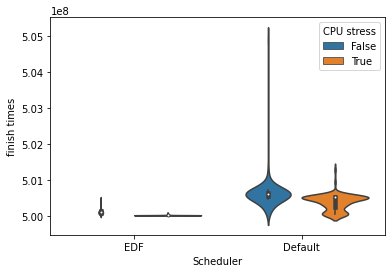

In [10]:
sns.violinplot( y=finish_times["finish times"], x=finish_times["Scheduler"], hue=finish_times["CPU stress"]);
plt.show()

In [11]:
#row_count = finish_times.shape[0]
#for i in range(row_count-1):
#    finish_times.at[i, 'finish times'] = finish_times.at[i, 'finish times'] - 500000000
#print(finish_times)

In [12]:
fig = px.box(finish_times, x="Scheduler", y="finish times", color='CPU stress', points="all")
fig.show()